In [18]:
from Game import *

Four functions to do:

1. `initial_state()`   return the state for the start of the game
2. `valid_moves(state,player)` return a list of valid moves
3. `update_state(state, player, move )` return the new state
4. `win_status(new_state,player)` returns one of `"win"`,`"lose"`,`"stalemate"` or `None`

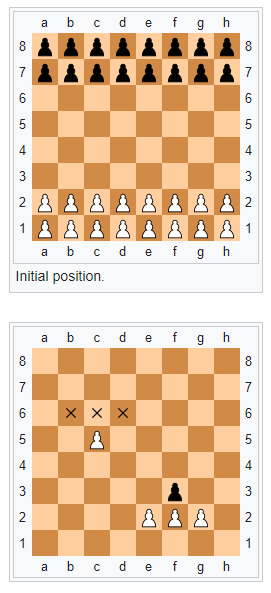

In [19]:
def initial_state():
    state=Board(5,5)
    
    row=0
    for col in range(5):
        state[row, col] = 1
        
    row=4
    for col in range(5):
        state[row, col] = 2
    
    return state

In [20]:
def valid_moves(state, player):
    moves=[]
    player1Column1down=[0,5,10,15]
    player2Column1up=[5,10,15,20]
    player1Column5down=[4,9,14,19]
    player2Column5up=[9,14,19,24]

    # Player 1 valid forward moves
    if player==1:
        for location in range(20):
            if state[location]==1:
                newLocation=location+5
                if newLocation<len(state) and state[newLocation]==0:
                    moves.append((location,newLocation))

    # Player 2 valid forward moves
    if player==2:
        for location in range(5, 25):
            if state[location]==2:
                newLocation=location-5
                if newLocation>=0 and state[newLocation]==0:
                    moves.append((location,newLocation))
                
    # Player 1 valid diagonal moves right
    if player==1:
        for location in range(20):
            if state[location]==1:
                if location%5==4:
                    continue
                newLocation=location+6
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                
    # Player 1 valid diagonal moves left
    if player==1:
        for location in range(5,25):
            if state[location]==1:
                if location%5==0:
                    continue
                newLocation=location+4
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                    
    # Player 1 valid diagonal moves down column 1 (0 index)
    if player==1:
        for location in player1Column1down:
            if state[location]==1:
                newLocation=location+6
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                    
    # Player 1 valid diagonal moves down column 5 (4 index)
    if player==1:
        for location in player1Column5down:
            if state[location]==1:
                newLocation=location+4
                if newLocation<len(state) and state[newLocation]==2:
                    moves.append((location,newLocation))
                
    # Player 2 valid diagonal moves right
    if player==2:
        for location in range(20):
            if state[location]==2:
                if location%5==4:
                    continue
                newLocation=location-6
                if newLocation>=0 and state[newLocation]==1:
                    moves.append((location,newLocation))
                
    # Player 2 valid diagonal moves left
    if player==2:
        for location in range(20):
            if state[location]==2:
                if location%5==0:
                    continue
                newLocation=location-4
                if newLocation>=0 and state[newLocation]==1:
                    moves.append((location,newLocation))
                    
    # Player 2 valid diagonal moves up column 1 (0 index)
    if player==2:
        for location in player2Column1up:
            if state[location]==2:
                newLocation=location-4
                if newLocation<len(state) and state[newLocation]==1:
                    moves.append((location,newLocation))
                    
    # Player 2 valid diagonal moves up column 5 (4 index)
    if player==2:
        for location in player2Column5up:
            if state[location]==2:
                newLocation=location-6
                if newLocation<len(state) and state[newLocation]==1:
                    moves.append((location,newLocation))

                    
    moves=[ [start,end] for start,end in moves]
                    
    return moves       

In [21]:
def update_state(state,player,move):
    start,end=move
    newState=state
    newState[start]=0
    newState[end]=player
    
    return newState

In [22]:
def win_status(state,player):
    # Win by reaching opposing players start row
    for col in range(5):
        if state[4, col]==1:
            return "win"
            
    for col in range(5):
        if state[0, col]==2:
            return "win"

    # Win by blocking and win by eliminating all opposing players' pieces
    if player==1 and not valid_moves(state,2):
        return "win"
    
    if player==2 and not valid_moves(state,1):
        return "win"

    return None


In [23]:
def human_move(state,player):
    
    while True:
        moves=eval(input("Enter your move"))

        if moves not in valid_moves(state,player):
            print("That is not a valid move")
        else:
            break
    
    return moves

human_agent=Agent(human_move)

In [24]:
def show_state(state,player):
    print(state)

In [25]:
def monkey_move(state,player):
    return random.choice(valid_moves(state,player))
monkey_agent=Agent(monkey_move)
random_move=monkey_move

Minimax Agent

In [26]:
from Game.minimax import *

In [27]:
def minimax_move(state,player):
    values,actions=minimax_values(state,player,display=True)
    return top_choice(actions,values)
minimax_agent=Agent(minimax_move)

Skittles Agent

In [28]:
def skittles_move(state,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action
    verbose=info.verbose

    
    if verbose:
        print("\t","Player ",player," is thinking...")
        print("\t","State: ",state)
        print("\t","Table:",S)
        print("\t","Last state,action: ",last_state,last_action)
    
    # make/adjust the table

    if state not in S:
        # add a row to the table for each move
        S[state]=Table()
        moves=valid_moves(state,player)
        for action in moves:
            S[state][action]=1  # number of skittles/beads for each move
    
        if verbose:
            print("\t","State ",state,"unknown...added to table")
            print("\t","Table",S)
    
    move=weighted_choice(S[state])
    if verbose:
        print("\t","Choosing from S[",state,"]",S[state],"....Move: ",move)

    if move is None:  # there are no skittles in this row
        if last_state:
            if verbose:
                print("\t","No possible moves!")
                print("\t","Modifying the table: removing one skittle from (state,action) ",last_state,last_action)
            S[last_state][last_action]=S[last_state][last_action]-1
            
            if verbose:
                print("\t","Table:",S)
                
            if S[last_state][last_action]<0:                
                S[last_state][last_action]=0
                if verbose:
                    print("\t","Negative skittles...fixing.")
                    print("\t","Table:",S)                
        else:
            if verbose:
                print("\t","Started in a bad state ",state,"with no moves and no last state.  Won't modify table.")
                  
                  

        move=random_move(state,player)

    
    return move

def skittles_after(status,player,info):
    S=info.S
    last_state=info.last_state
    last_action=info.last_action
    verbose=info.verbose

    if verbose:
        print("\t","End of Game adjustments")
        print("\t","Player ",player," is thinking...")
        print("\t","Win Status: ",status)
        print("\t","Table:",S)
        print("\t","Last state,action: ",last_state,last_action)
        
    if status=='lose':
        if last_state:
            S[last_state][last_action]=S[last_state][last_action]-1
            if S[last_state][last_action]<0:
                S[last_state][last_action]=0
                
            if verbose:
                print("\t","Modifying the table: removing one skittle from (state,action) ",last_state,last_action)
                print("\t","Table:",S)

                
        else:
            if verbose:
                print("\t","No last state, so nothing to learn.")
            
                
    else:
        if verbose:
            print("\t","No adjustments needed.")
        
    # does this double-count the learning if you lose on your own turn

In [29]:
g=Game()
g.display=False
g.run(monkey_agent,minimax_agent)

  Choice Time: 45.82617783546448 seconds 
  Choice Time: 40.28234672546387 seconds 
  Choice Time: 20.23776388168335 seconds 
  Choice Time: 4.326352596282959 seconds 
  Choice Time: 1.9570600986480713 seconds 
  Choice Time: 0.11332869529724121 seconds 
  Choice Time: 0.0156252384185791 seconds 
  Choice Time: 0.015624046325683594 seconds 


[2]

Load the Skittles Agent Tables

In [30]:
skittles_agent1=Agent(skittles_move)
skittles_agent1.S=LoadTable("../breakthrough skittles1.json")
skittles_agent1.post=skittles_after
skittles_agent1.verbose=False

skittles_agent2=Agent(skittles_move)
skittles_agent2.S=LoadTable("../breakthrough skittles2.json")
skittles_agent2.post=skittles_after
skittles_agent2.verbose=False

Test the Skittles Agent

In [31]:
g=Game()
g.run(human_agent,skittles_agent2)

====
Game  1
 1  1  1  1  1 
 0  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 



Enter your move [0,5]


Player 1 moves [0, 5]
 0  1  1  1  1 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  0  0  0 
 2  2  2  2  2 

Player 2 moves [22, 17]
 0  1  1  1  1 
 1  0  0  0  0 
 0  0  0  0  0 
 0  0  2  0  0 
 2  2  0  2  2 



Enter your move [5,10]


Player 1 moves [5, 10]
 0  1  1  1  1 
 0  0  0  0  0 
 1  0  0  0  0 
 0  0  2  0  0 
 2  2  0  2  2 

Player 2 moves [24, 19]
 0  1  1  1  1 
 0  0  0  0  0 
 1  0  0  0  0 
 0  0  2  0  2 
 2  2  0  2  0 



Enter your move [10,15]


Player 1 moves [10, 15]
 0  1  1  1  1 
 0  0  0  0  0 
 0  0  0  0  0 
 1  0  2  0  2 
 2  2  0  2  0 

Player 2 moves [21, 16]
 0  1  1  1  1 
 0  0  0  0  0 
 0  0  0  0  0 
 1  2  2  0  2 
 2  0  0  2  0 



Enter your move [1,6]


Player 1 moves [1, 6]
 0  0  1  1  1 
 0  1  0  0  0 
 0  0  0  0  0 
 1  2  2  0  2 
 2  0  0  2  0 

Player 2 moves [16, 11]
 0  0  1  1  1 
 0  1  0  0  0 
 0  2  0  0  0 
 1  0  2  0  2 
 2  0  0  2  0 



Enter your move [4,9]


Player 1 moves [4, 9]
 0  0  1  1  0 
 0  1  0  0  1 
 0  2  0  0  0 
 1  0  2  0  2 
 2  0  0  2  0 

Player 2 moves [17, 12]
 0  0  1  1  0 
 0  1  0  0  1 
 0  2  2  0  0 
 1  0  0  0  2 
 2  0  0  2  0 



Enter your move [2,7]


Player 1 moves [2, 7]
 0  0  0  1  0 
 0  1  1  0  1 
 0  2  2  0  0 
 1  0  0  0  2 
 2  0  0  2  0 

Player 2 moves [19, 15]
 0  0  0  1  0 
 0  1  1  0  1 
 0  2  2  0  0 
 2  0  0  0  0 
 2  0  0  2  0 



Enter your move [9,14]


Player 1 moves [9, 14]
 0  0  0  1  0 
 0  1  1  0  0 
 0  2  2  0  1 
 2  0  0  0  0 
 2  0  0  2  0 

Player 2 moves [12, 6]
 0  0  0  1  0 
 0  2  1  0  0 
 0  2  0  0  1 
 2  0  0  0  0 
 2  0  0  2  0 



Enter your move [14,19]


Player 1 moves [14, 19]
 0  0  0  1  0 
 0  2  1  0  0 
 0  2  0  0  0 
 2  0  0  0  1 
 2  0  0  2  0 

Player 2 moves [6, 1]
 0  2  0  1  0 
 0  0  1  0  0 
 0  2  0  0  0 
 2  0  0  0  1 
 2  0  0  2  0 

Player  2 won.


[2]

In [32]:
g=Game(number_of_games=100)
g.display=False
result=g.run(minimax_agent,skittles_agent2)
g.report()

  Choice Time: 0.0 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.05185437202453613 seconds 
  Choice Time: 0.16370773315429688 seconds 
  Choice Time: 0.5113730430603027 seconds 
  Choice Time: 0.06249856948852539 seconds 
  Choice Time: 0.14120912551879883 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.01563405990600586 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.042690277099609375 seconds 
  Choice Time: 0.48319292068481445 seconds 
  Choice Time: 0.06261062622070312 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.5096724033355713 seconds 
  Choice Time: 0.6035728454589844 seconds 
  Choice Time: 0.24478793144226074 seconds 
  Choice Time: 0.2214052677154541 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.0 seconds 
  Choice Time: 0.8370692729949951 secon